Miernik czasu

In [1]:
import time
import math

In [2]:
class Timer(object):
    
    def __enter__(self):
        self.start = time.time()
        return self
    
    def __exit__(self, *args):
        self.end = time.time()
        self.time = self.end - self.start

In [3]:
from decimal import *
getcontext().prec = 1000

def e_taylor_series_decimal(n):
    sum = Decimal(0)
    temp_factorial = Decimal(1);
    for i in range(1,n):
        temp_factorial *= Decimal(i)
        sum += Decimal(1)/temp_factorial
    return sum+1
def e_continued_fraction_decimal(n):
    tmp = Decimal(n)
    for i in reversed(range(1,n)):
        tmp = Decimal(i) + Decimal(i) / tmp
    return 2+1/tmp
def e_brother_formula_decimal(n):
    sum = Decimal(1)
    temp_factorial = Decimal(1)
    for i in range(1,n):
        temp_factorial *= Decimal(2*i)
        temp_factorial *= Decimal(2*i+1)
        sum += Decimal(i+1) / temp_factorial
    return Decimal(2)*sum

In [4]:
with Timer() as timer:
    e= e_brother_formula_decimal(100000)

In [5]:
timer.time 

2.446411371231079

In [6]:
e

Decimal('2.71828182845904523536028747135266249775724709369995957496696762772407663035354759457138217852516642742746639193200305992181741359662904357290033429526059563073813232862794349076323382988075319525101901157383418793070215408914993488416750924476146066808226480016847741185374234544243710753907774499206955170276183860626133138458300075204493382656029760673711320070932870912744374704723069697720931014169283681902551510865746377211125238978442505695369677078544996996794686445490598793163688923009879312773617821542499922957635148220826989519366803318252886939849646510582093923982948879332036250944311730123819706841614039701983767932068328237646480429531180232878250981945581530175671736133206981125099618188159304169035159888851934580727386673858942287922849989208680582574927961048419844436346324496848756023362482704197862320900216099023530436994184914631409343173814364054625315209618369088870701676839642437814059271456354906130310720851038375051011574770417189861068739696552126715468

In [7]:
iterations = [i for i in range(1,500,5)]
functions = [e_taylor_series_decimal, e_continued_fraction_decimal, e_brother_formula_decimal]
functions_names = ['taylor', 'continued', 'brother']


In [8]:
%%time
results = []
for it in iterations:
    for f, name in zip(functions, functions_names):
        with Timer() as timer:
            value = f(it)
        error = abs(e - value)
        t = timer.time
        results.append([name, t, error.log10() if error > 0 else 0])


CPU times: user 3.52 s, sys: 0 ns, total: 3.52 s
Wall time: 3.52 s


In [9]:
import pandas as pd
df = pd.DataFrame(results, columns = ['Metoda', 'Czas', 'Dokładność'])
df.head(10)

,Metoda,Czas,Dokładność
0,taylor,0.000018,0.23509439727547039031635664050141910814960761...
1,continued,0.000019,-0.5501851390084110828437681452683695724167165...
2,brother,0.000008,-0.1437051204799536150135739005485855105388354...
3,taylor,0.000019,-2.7917839674394887324522002211730377906618937...
4,continued,0.000123,-4.7329057758751394530990963380911517255882706...
5,brother,0.000023,-8.6457854272159527168440210755827275826596719...
6,taylor,0.000037,-7.5636359895268575146715087589741337145763595...
7,continued,0.000233,-10.099955674521022910578263844470427423599602...
8,brother,0.000042,-21.031498548627923721457417322264027245627023...
9,taylor,0.000045,-13.294383642533156585646425918852616601259199...


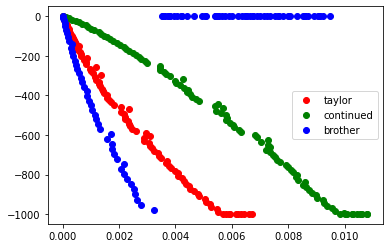

In [10]:
import matplotlib.pyplot as plt

for metoda, c in zip(functions_names,['red','green','blue']):
    data = df[df['Metoda'] == metoda]
    plt.scatter(data['Czas'], data['Dokładność'], color = c, label=metoda)
plt.legend()
plt.show()